In [26]:
import requests
from bs4 import BeautifulSoup

In [27]:
import matplotlib.pyplot as plt

In [28]:
url = 'https://quke.ru/shop/smartfony?pfrom=379&pto=148490&availability=instock&page-size=72'
response = requests.get(url)
print(response)

<Response [200]>


In [29]:
bs = BeautifulSoup(response.text)
print(bs)

<!DOCTYPE html>
<html dir="ltr" lang="ru">
<head>
<script>var IS_GAME_ACTIVE = false</script>
<title>Купить смартфоны в Москве, цена на смартфоны в интернет-магазине</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="c727dff837da9788c3aeab406346e271" name="p:domain_verify"/>
<meta content="General" name="rating"/>
<meta content="category" name="route-name"/>
<link href="https://quke.ru/shop/smartfony" rel="canonical"/>
<link href="//gotosu.ru" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="dns-prefetch"/>
<link href="//www.googletagmanager.com" rel="dns-prefetch"/>
<link href="//mc.yandex.ru" rel="dns-prefetch"/>
<link href="//googleads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//cdn.retailrocket.ru" rel="dns-prefetch"/>
<link href="//www.google-analytics.com" rel="preconnect"/>
<link href="//www.googletagmanager.com" rel="preconnect"/>
<link href="//mc.yandex.ru" rel="preconnect"/>
<link href="//googleads.g.doublecl

In [30]:
url = 'https://quke.ru/shop/smartfony?pfrom=379&pto=148490&availability=instock&page-size=72'
max_pages = 11

price_list = []

for p in range(max_pages):
    cur_url = url + '&page=' + str(p + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    p = soup.find_all('span', 'b-card2-v2__price-val') 
    for i in p:
        price = i.text
        if len(price.split()) != 1:
            price_list.append(int(str(price.split()[0]) + str(price.split()[1])))
        else:
            price_list.append(int(price))
        
names_list = []

for n in range(max_pages):
    cur_url = url + '&page=' + str(n + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    n = soup.find_all('a', 'b-card2-v2__name') 
    for i in n:
        name = i.text
        names_list.append(name)
        
articul_list = []

for x in range(max_pages):
    cur_url = url + '&page=' + str(x + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    x = soup.find_all('div', 'b-card2-v2__artnumber') 
    for i in x:
        articul = i.text
        articul_list.append(int(articul.split(':')[1]))
        
screen = []

for info in range(max_pages):
    cur_url = url + '&page=' + str(info + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    info = soup.find_all('div', 'b-card2-v2') 
    for i in info:
        info_for_one = i.find_all('span', 'value')
        screen.append(info_for_one[0].text.split(',')[0])

inch = []

for i in range(max_pages):
    cur_url = url + '&page=' + str(i + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    i = soup.find_all('div', 'b-card2-v2') 
    for j in i:
        inch_for_one = j.find_all('span', 'value')
        if len(inch_for_one[0].text.split(',')) == 1:
            inch.append(None)
        else:
            if float(inch_for_one[0].text.split(',')[1].split()[0]) > 10:
                inch.append(None)
            else:
                inch.append(float(inch_for_one[0].text.split(',')[1].split()[0]))

main_camera = []
second_camera = []

for i in range(max_pages):
    cur_url = url + '&page=' + str(i + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    i = soup.find_all('div', 'b-card2-v2') 
    for j in i:
        main_camera_for_one = j.find_all('span', 'value')
        photo = main_camera_for_one[1].text.split()
        if len(photo) == 1:
            main_camera.append(None)
        elif photo[1] == 'Мп' or photo[1] == 'Мп,':
            main_camera.append(float(photo[0]))
        elif photo[1] == 'мАч':
            main_camera.append(None)
        else:
            main_camera.append(float(photo[0]))
        if len(photo) == 6:
            second_camera.append(float(photo[4]))
        else:
            second_camera.append(None)
            
processor_name = []
processor_rate = []

for i in range(max_pages):
    cur_url = url + '&page=' + str(i + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    i = soup.find_all('div', 'b-card2-v2') 
    for j in i:
        proc = j.find_all('span', 'value')
        if len(proc) >=4:
            if len(proc[3].text.split()) != 1:
                if len(proc[3].text.split(', ')) != 1:
                    processor_name.append(proc[3].text.split(', ')[0])
                    processor_rate.append(float(proc[3].text.split(', ')[1].split()[0]))
                else:
                    processor_name.append(None)
                    processor_rate.append(None)
            else:
                processor_name.append(None)
                processor_rate.append(None)
        else:
            processor_name.append(None)
            processor_rate.append(None)

internal_memory = []
ram = []

for i in range(max_pages):
    cur_url = url + '&page=' + str(i + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    i = soup.find_all('div', 'b-card2-v2') 
    for j in i:
        memory = j.find_all('span', 'value')
        if len(memory) > 3:
            if len(memory[2].text) != 1:
                if '/' in memory[2].text:
                    memory = memory[2].text.split('/')
                    internal_memory.append(float(memory[0].split()[0]))
                    ram.append(float(memory[1].split()[0]))
                else:
                    if 'ГБ' in memory[2].text:
                        internal_memory.append(float(memory[2].text.split()[0]))
                        ram.append(None)
                    else:
                        internal_memory.append(None)
                        ram.append(None)
            else:
                internal_memory.append(None)
                ram.append(None)
        else:
            internal_memory.append(None)
            ram.append(None)

battery = []

for i in range(max_pages):
    cur_url = url + '&page=' + str(i + 1)
    html_text = requests.get(cur_url).text
    soup = BeautifulSoup(html_text, 'lxml')
    i = soup.find_all('div', 'b-card2-v2') 
    for j in i:
        bat = j.find_all('span', 'value')
        if len(bat) > 4:
            battery.append(int(bat[4].text.split()[0]))
        else:
            battery.append(None)

In [31]:
import pandas as pd
df = pd.DataFrame({'Name':names_list,
             'Price': price_list,
             'Articul': articul_list,
              'Screen': screen, 
              'Inch': inch, 
              'Main camera': main_camera,
              'Second camera': second_camera,
              'Processor name': processor_name, 
              'Processor rate': processor_rate, 
              'Internal memory': internal_memory,
              'RAM': ram, 
              'Battery': battery
             })

In [32]:
df

,Name,Price,Articul,Screen,Inch,Main camera,Second camera,Processor name,Processor rate,Internal memory,RAM,Battery
0,Realme 10 8 128Gb Black,16590,118653,2400x1080,6.40,50.0,16.0,Helio G99,2.20,128.0,8.0,5000.0
1,Xiaomi Redmi Note 10 Pro 8 128Gb NFC RU Onyx ...,19490,93367,2400x1080,6.67,108.0,16.0,Snapdragon 732G,2.30,128.0,8.0,5020.0
2,Apple iPhone 14 Pro Max 256Gb nanoSim + eSim ...,111490,116596,2796x1290,6.70,48.0,12.0,A16 Bionic,3.46,256.0,6.0,4323.0
3,Apple iPhone 14 Pro Max 256Gb nanoSim + eSim ...,110990,116609,2796x1290,6.70,48.0,12.0,A16 Bionic,3.46,256.0,6.0,4323.0
4,Realme 10 8 128Gb White,16590,118650,2400x1080,6.40,50.0,16.0,Helio G99,2.20,128.0,8.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
664,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Blue,26990,118992,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0
665,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Pink,26990,118993,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0
666,Xiaomi Redmi Note 12 Pro 5G 8 256Gb EU Pink,39990,119001,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.60,256.0,8.0,5000.0
667,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU White,26990,118991,2400x1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0


Описание перменных:

- Name - полное название телефона
- Price - цена 
- Articul - артикул на сайте
- Screen - разрешение экрана
- Inch - диагональ смартфона (в дюймах)
- Main camera - основная камера(в мп)
- Second camera - фронтальная камера (в мп)
- Processor name - модель процессора
- Processor rate - частота процессора (в ГГц)
- Internal memory - встроенная память (в ГБ)
- RAM - оперативная память (в ГБ)
- Battery - характеристика аккумулятора

Необходимо обработать разрешение экрана, чтобы сделать его числовым. 

In [33]:
a = 0
for i in df['Screen']:
    if 'дюйм' in i:
        df = df.replace(i, None)
    else:
        if 'x' in i:
            a = i.split('x')
        else:
            a = i.split('х')
        df = df.replace(i, int(a[1]))

['2400', '1080']
['2400', '1080']
['2796', '1290']
['2796', '1290']
['2400', '1080']
['2556', '1179']
['2408', '1080']
['2400', '1080']
['2400', '1080']
['2400', '1080']
['2408', '1080']
['1650', '720']
['1600', '720']
['1650', '720']
['2400', '1080']
['2796', '1290']
['2400', '1080']
['2408', '1080']
['1650', '720']
['2408', '1080']
['1600', '720']
['2400', '1080']
['2796', '1290']
['2400', '1080']
['2532', '1170']
['2408', '1080']
['2400', '1080']
['2796', '1290']
['1650', '720']
['2388', '1080']
['2400', '1080']
['2532', '1170']
['1600', '720']
['1650', '720']
['1650', '720']
['2400', '1080']
['2460', '1080']
['3216', '1440']
['1600', '720']
['2400', '1080']
['2340', '1080']
['2400', '1080']
['2408', '1080']
['2400', '1080']
['1650', '720']
['2400', '1080']
['2400', '1080']
['2408', '1080']
['2400', '1080']
['2556', '1179']
['2408', '1080']
['2400', '1080']
['1600', '720']
['2408', '1080']
['2400', '1080']
['2408', '1080']
['2532', '1170']
['2340', '1080']
['2400', '1080']
['1792', 

Займемся обработкой пропусков.

In [34]:
df.isnull().sum()

Name                0
Price               0
Articul             0
Screen              5
Inch                5
Main camera        20
Second camera      72
Processor name     84
Processor rate     84
Internal memory    62
RAM                69
Battery            94
dtype: int64

Заполним None значения. Я буду заполнять их модой по каждому столбцу соответственно, так как использовать среднее в данном случае будет не лучшим вариантом, ведь переменные могут принимать только конкретные значения. Подсчет среднего может привести к тому, что средним значением будет, например, RAM=7,25, однако данный показатель не может принимать дробное значение. 

In [35]:
df['Screen'][df['Screen'].isnull()] = df['Screen'].mode()[0]  # заполняем пропуски в столбце "Screen"
df['Inch'][df['Inch'].isnull()] = df['Inch'].mode()[0]  # заполняем пропуски в столбце "Inch"
df['Main camera'][df['Main camera'].isnull()] = df['Main camera'].mode()[0]  # заполняем пропуски в столбце "Main camera"
df['Second camera'][df['Second camera'].isnull()] = df['Second camera'].mode()[0]  # заполняем пропуски в столбце "Second camera"
df['Processor name'][df['Processor name'].isnull()] = df['Processor name'].mode()[0]  # заполняем пропуски в столбце "Processor name"
df['Processor rate'][df['Processor rate'].isnull()] = df['Processor rate'].mode()[0]  # заполняем пропуски в столбце "Processor rate"
df['Internal memory'][df['Internal memory'].isnull()] = df['Internal memory'].mode()[0]  # заполняем пропуски в столбце "Internal memory"
df['RAM'][df['RAM'].isnull()] = df['RAM'].mode()[0]  # заполняем пропуски в столбце "RAM"
df['Battery'][df['Battery'].isnull()] = df['Battery'].mode()[0]  # заполняем пропуски в столбце "Battery"

/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_18366/2915442042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Screen'][df['Screen'].isnull()] = df['Screen'].mode()[0]  # заполняем пропуски в столбце "Screen"
/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_18366/2915442042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inch'][df['Inch'].isnull()] = df['Inch'].mode()[0]  # заполняем пропуски в столбце "Inch"
/var/folders/db/n7ph30_n6793fmm710rhb95m0000gn/T/ipykernel_18366/2915442042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [36]:
df['Screen'] = df['Screen'].astype(int)

Создадим новые переменные.

In [37]:
brand = []
for elem in df['Name']:
    brand.append(elem.split()[0])

In [38]:
df['Name of brand'] = brand

Обобщим и добавим еще один признак "Операционная система".

In [39]:
operating_system = []
for x in df['Name of brand']:
    if x == 'Apple':
        operating_system.append('IOS')
    elif x == 'Philips':
        operating_system.append('Nucleus')
    elif x == 'Digma' or x == 'Vertex' or x == 'Alcatel' or x == 'Corn' or x == 'Sunwind' or x == 'Joys' or x == 'Panasonic':
        operating_system.append('Not defined')
    else:
        operating_system.append('Android')

In [40]:
df['Operating system'] = operating_system

Создадим еще один признак - цвет телефона. 

In [42]:
color = []
for elem in df['Name']:
    color.append(elem.split()[-1])

In [43]:
df['Color'] = color

In [109]:
eSim = []
for i in df['Name']:
    if 'eSim' in i:
        eSim.append(1)
    else:
        eSim.append(0)

In [113]:
df['eSim'] = eSim

In [114]:
df

,Name,Price,Articul,Screen,Inch,Main camera,Second camera,Processor name,Processor rate,Internal memory,RAM,Battery,Name of brand,Operating system,Color,eSim
0,Realme 10 8 128Gb Black,16590,118653,1080,6.40,50.0,16.0,Helio G99,2.20,128.0,8.0,5000.0,Realme,Android,Black,0
1,Xiaomi Redmi Note 10 Pro 8 128Gb NFC RU Onyx ...,19490,93367,1080,6.67,108.0,16.0,Snapdragon 732G,2.30,128.0,8.0,5020.0,Xiaomi,Android,Gray,0
2,Apple iPhone 14 Pro Max 256Gb nanoSim + eSim ...,111490,116596,1290,6.70,48.0,12.0,A16 Bionic,3.46,256.0,6.0,4323.0,Apple,IOS,Black,1
3,Apple iPhone 14 Pro Max 256Gb nanoSim + eSim ...,110990,116609,1290,6.70,48.0,12.0,A16 Bionic,3.46,256.0,6.0,4323.0,Apple,IOS,Purple,1
4,Realme 10 8 128Gb White,16590,118650,1080,6.40,50.0,16.0,Helio G99,2.20,128.0,8.0,5000.0,Realme,Android,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Blue,26990,118992,1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0,Xiaomi,Android,Blue,0
665,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU Pink,26990,118993,1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0,Xiaomi,Android,Pink,0
666,Xiaomi Redmi Note 12 Pro 5G 8 256Gb EU Pink,39990,119001,1080,6.67,50.0,16.0,Dimensity 1080,2.60,256.0,8.0,5000.0,Xiaomi,Android,Pink,0
667,Xiaomi Redmi Note 12 Pro 5G 6 128Gb EU White,26990,118991,1080,6.67,50.0,16.0,Dimensity 1080,2.60,128.0,6.0,5000.0,Xiaomi,Android,White,0


Построим графики для того, чтобы посмотреть на распределение разных признаков.

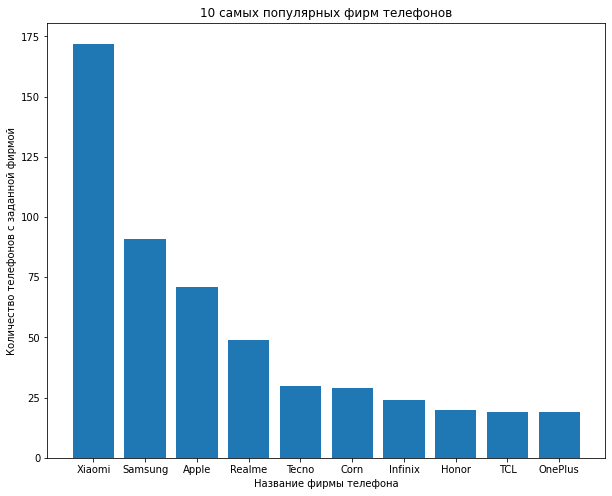

In [45]:
plt.figure(figsize=(10, 8))
popular_brands = df['Name of brand'].value_counts()[:10]
plt.bar(popular_brands.index, popular_brands)
plt.xlabel('Название фирмы телефона')
plt.ylabel('Количество телефонов с заданной фирмой')
plt.title('10 самых популярных фирм телефонов');

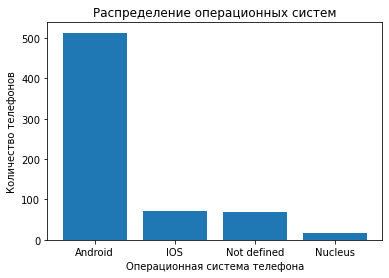

In [76]:
plt.bar(df['Operating system'].value_counts().index, df['Operating system'].value_counts());
plt.xlabel('Операционная система телефона')
plt.ylabel('Количество телефонов')
plt.title('Распределение операционных систем');

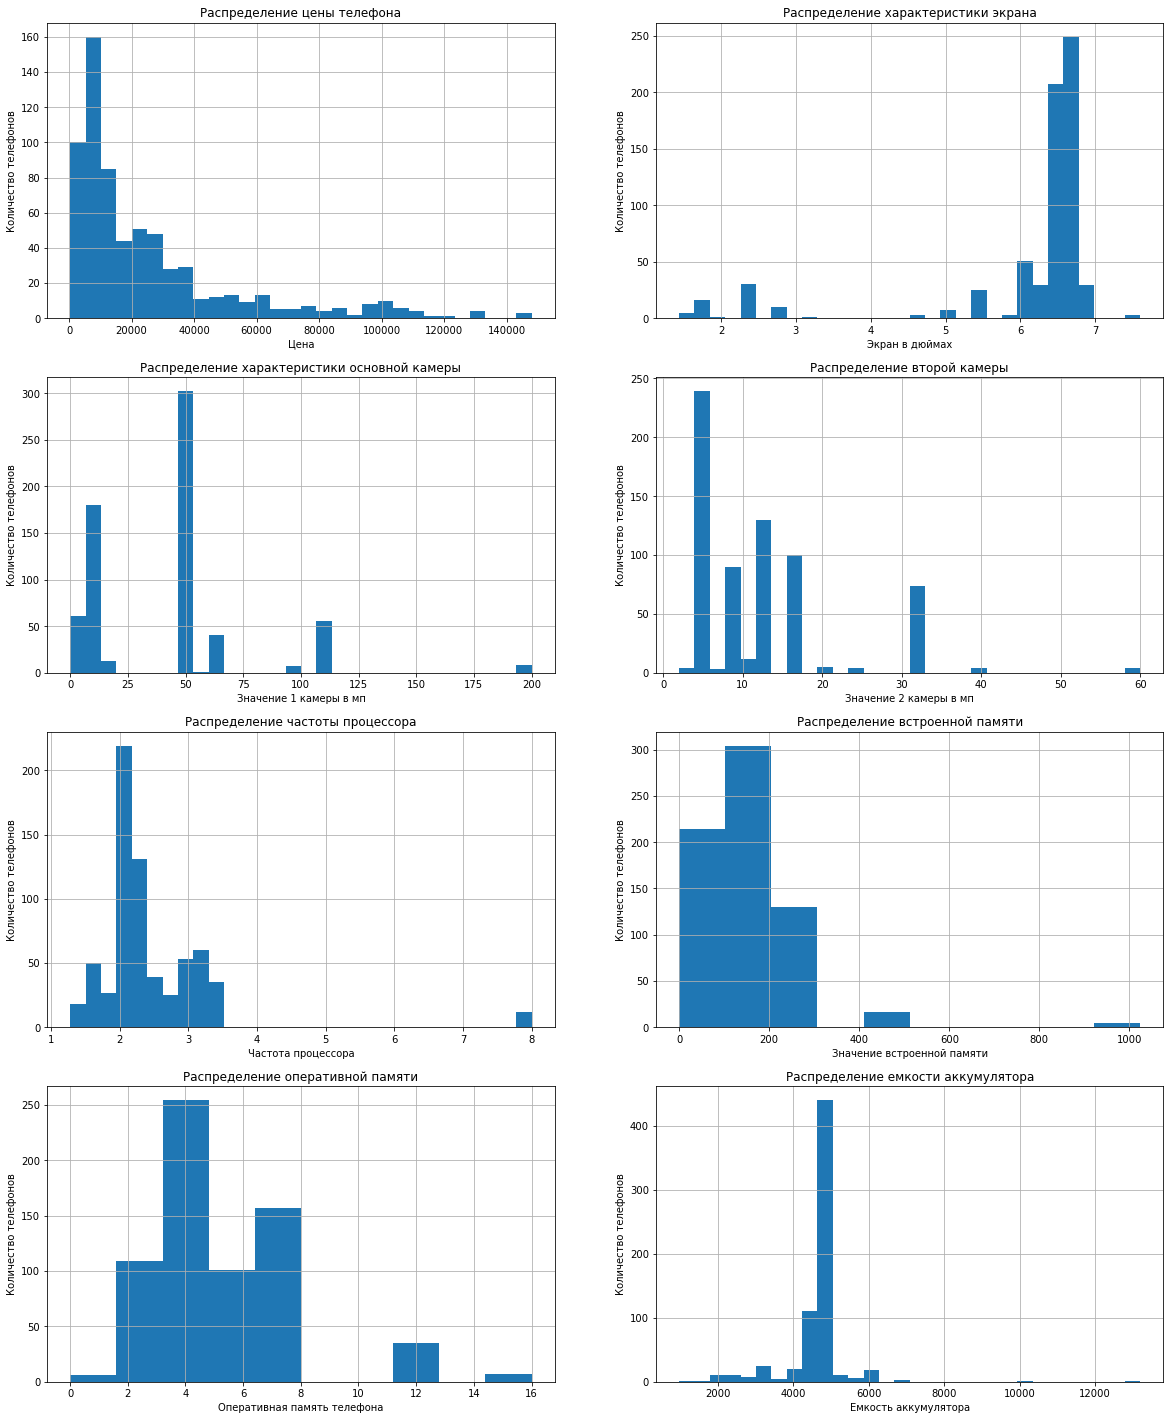

In [79]:
plt.figure(figsize=(20, 25))

sp = plt.subplot(421)
df['Price'].hist(bins=30)
plt.xlabel('Цена')
plt.ylabel('Количество телефонов')
plt.title('Распределение цены телефона');

sp = plt.subplot(422)
df['Inch'].hist(bins=30)
plt.xlabel('Экран в дюймах')
plt.ylabel('Количество телефонов')
plt.title('Распределение характеристики экрана');

sp = plt.subplot(423)
df['Main camera'].hist(bins=30)
plt.xlabel('Значение 1 камеры в мп')
plt.ylabel('Количество телефонов')
plt.title('Распределение характеристики основной камеры');

sp = plt.subplot(424)
df['Second camera'].hist(bins=30)
plt.xlabel('Значение 2 камеры в мп')
plt.ylabel('Количество телефонов')
plt.title('Распределение второй камеры');

sp = plt.subplot(425)
df['Processor rate'].hist(bins=30)
plt.xlabel('Частота процессора')
plt.ylabel('Количество телефонов')
plt.title('Распределение частоты процессора');

sp = plt.subplot(426)
df['Internal memory'].hist(bins=10)
plt.xlabel('Значение встроенной памяти')
plt.ylabel('Количество телефонов')
plt.title('Распределение встроенной памяти');

sp = plt.subplot(427)
df['RAM'].hist(bins=10)
plt.xlabel('Оперативная память телефона')
plt.ylabel('Количество телефонов')
plt.title('Распределение оперативной памяти');

sp = plt.subplot(428)
df['Battery'].hist(bins=30)
plt.xlabel('Емкость аккумулятора')
plt.ylabel('Количество телефонов')
plt.title('Распределение емкости аккумулятора');

На каждом графике можно заметить значения, которые похожи на выбросы. Например, на графике Main Camera есть несколько выбросов больше 175. Аналогично на графике Internal memory выбросы со значениями больше 800. 
Лучше всего их удалить, так как иначе некоторые предпосылки для проверки гипотез будут нарушены, а так же выбросы могут оказать негативное влияние на ML. 

In [106]:
df = df[df['Screen'] < 1500]

In [107]:
df = df[df['Main camera'] < 150]

In [86]:
df = df[df['Second camera'] < 50]

In [87]:
df = df[df['Processor rate'] < 4]

In [88]:
df = df[df['Internal memory'] < 600]

In [89]:
df = df[df['Battery'] < 8000]

Теперь попробуем найти определенные зависимости в признаках:

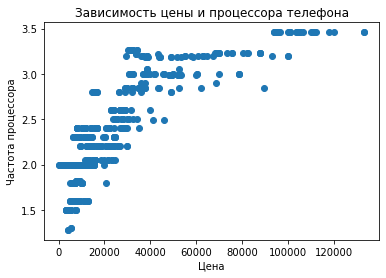

In [115]:
plt.scatter(x=df['Price'], y=df['Processor rate'])
plt.xlabel('Цена')
plt.ylabel('Частота процессора')
plt.title('Зависимость цены и процессора телефона');

Чем ниже цена, то меньше значение частоты процессора. Однако стоит отметить, что график похож на логарифмическую функцию, то есть после определенного уровня цены значения по оси y почти перестают рости. Таким образом, есть определенное максимальное (на данный момент) значение частоты процессора. Телефоны с большим значением пока что не делают, что может объясняться разными прчинами. И отсутствуем необходимости, и невозможностью из-за ограниченных технологий. 

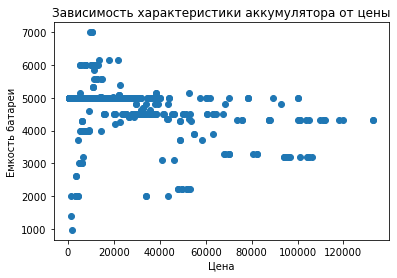

In [116]:
plt.scatter(x=df['Price'], y=df['Battery'])
plt.xlabel('Цена')
plt.ylabel('Емкость батареи')
plt.title('Зависимость характеристики аккумулятора от цены');

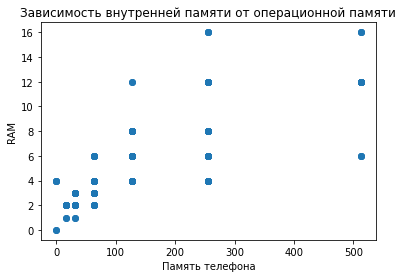

In [117]:
plt.scatter(x=df['Internal memory'], y=df['RAM'])
plt.xlabel('Память телефона')
plt.ylabel('RAM')
plt.title('Зависимость внутренней памяти от операционной памяти');

В начале графика можно заметить небольшую зависимость: чем больше Internal memory, тем больше RAM. Однако есть выброс.

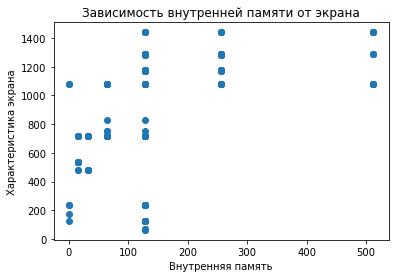

In [118]:
plt.scatter(df['Internal memory'], df['Screen'])
plt.xlabel('Внутренняя память')
plt.ylabel('Характеристика экрана')
plt.title('Зависимость внутренней памяти от экрана');

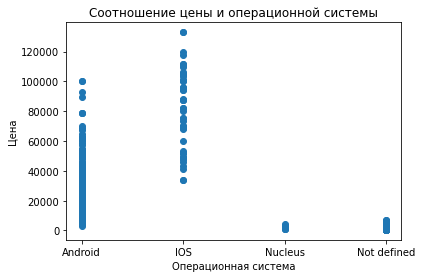

In [119]:
plt.scatter(df['Operating system'], df['Price'])
plt.xlabel('Операционная система')
plt.ylabel('Цена')
plt.title('Соотношение цены и операционной системы');

На графике можно заметить, что телефоны с операционной системой IOS стоят в среднем чуть больше, чем другие. Отдельно стоит отметить,что телефоны Nucleus и с неопределенной операционной системой стоят очень мало. В основном, это были кнопочные телефоны, либо очень дешевые телефоны с плохими характеристиками.

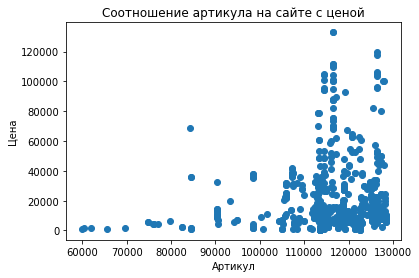

In [120]:
plt.scatter(df['Articul'], df['Price'])
plt.xlabel('Артикул')
plt.ylabel('Цена')
plt.title('Соотношение артикула на сайте с ценой');

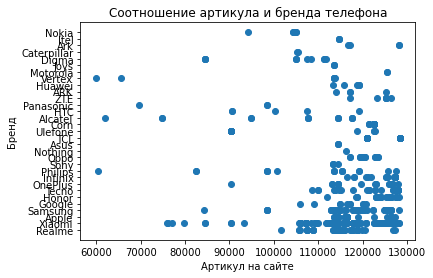

In [121]:
plt.scatter(df['Articul'], df['Name of brand'])
plt.xlabel('Артикул на сайте')
plt.ylabel('Бренд')
plt.title('Соотношение артикула и бренда телефона');

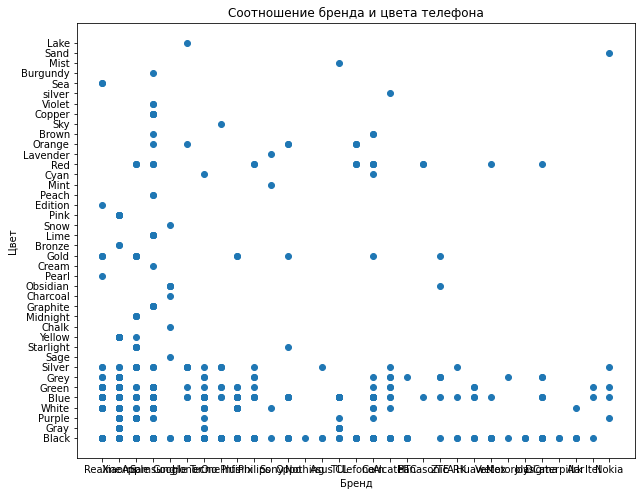

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Name of brand'], df['Color'])
plt.xlabel('Бренд')
plt.ylabel('Цвет')
plt.title('Соотношение бренда и цвета телефона');

Можно заметить, что почти у всех брендов есть телефоны черного цвета. Также достаточно популярны серый, голубой и белый цвета. 

### Гипотезы. 

- мат ожидание цены равно 30000
- айфон в среднем стоит дороже чем андроид (ди для разницы мат ожиданий)
- медиана цены равна 20000

- вероятность наткнуться на телефон ксяоми больше 0,3
- в среднем ксяоми черного цвета стоит дороже, чем других цветов
- более половины телефонов стоят меньше 40к (критерий знаков)

In [131]:
from scipy import stats

Проверим самую просто гипотезу о том, что математическое ожидание цены равно 30000 с помощью z-теста (предпосылки соблюдаются)

In [123]:
price_mean = df['Price'].mean()
price_std = df['Price'].std()
n = df.shape[0]

In [126]:
diff = price_mean - 30000
z_obs = diff / (price_std / np.sqrt(n))
z_obs

-7.053213780327142

In [129]:
alpha = 0.05
z_cr = stats.norm.ppf(1-alpha/2)

In [130]:
z_obs, z_cr

(-7.053213780327142, 1.959963984540054)

z_obs < -z_cr, поэтому гипотеза отвергается. 

Проверим гипотезу о равенстве математических ожиданий цены айфона и цены на операционной системе андроид с помощью z-теста, предпосылки так же соблюдаются.

In [132]:
alpha = 0.05  
y = df[df['Operating system'] == 'Android'].Price
x = df[df['Operating system'] == 'IOS'].Price

diff = x.mean() - y.mean() 
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/ny)
                                    
z_obs = diff/diff_std    
z_crit = stats.norm.ppf(1 - alpha/2) 

In [133]:
z_obs

17.446616007962596

In [134]:
z_crit

1.959963984540054

z-obs > z-crit, поэтому гипотеза о равенстве математических ожиданий отвергается.

Проверим гипотезу о том, что медиана цены равна 15000 с помощью критерия знаков. 

In [140]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue_1 = sign_test(df['Price'], mu0=15000)
pvalue_1

0.03203792931823447

Данное значение меньше 5%, поэтому на уровне значимости 5% мы можем отвергнуть гипотезу о том, что медиана цены равна 15000. 

### Машинное обучение.

Я буду предсказывать цену телефона, основываясь на других числовых переменных, то есть решать задачу линейной регрессии. В качестве метрик использую mae, r2.

In [141]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [144]:
y = df['Price']
X = df.drop(columns=['Price'])
feature_names = X.columns.values

numeric_features = X.select_dtypes([np.number]).columns
categorical_features = X.dtypes[X.dtypes == "object"].index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111) 

In [145]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [146]:
print("Кол-во признаков до OneHot:", X_train.shape[1])
print("Кол-во признаков после OneHot:", column_transformer.fit_transform(X_train).shape[1])

Кол-во признаков до OneHot: 15
Кол-во признаков после OneHot: 661


Можно заметить, что количество признаков сильно увеличилось после OneHotEncoding. Наверное, лучше оставить только самые основные категориальные признаки, иначе количество переменных становится больше, чем количество наблюдений.
Оставим колонки Name of brand, Color. Сделаем еще раз. 

In [147]:
y = df['Price']
X = df.drop(columns=['Price'])
feature_names = X.columns.values

numeric_features = X.select_dtypes([np.number]).columns
categorical_features = [X.dtypes[X.dtypes == "object"].index[2], X.dtypes[X.dtypes == "object"].index[4]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [149]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

In [150]:
print("Кол-во признаков до OneHot:", X_train.shape[1])
print("Кол-во признаков после OneHot:", column_transformer.fit_transform(X_train).shape[1])

Кол-во признаков до OneHot: 15
Кол-во признаков после OneHot: 76


Однако, чтобы не возникло переобучения, необходимо использовать регуляризацию. Я решила использовать Лассо, так как, возможно, какие-то признаки никак не влияют на цену (например, цвет телефона), поэтому возможность зануления некоторых признаков в данном случае может пригодиться.

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error

In [165]:
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train)}')

MAE на тестовой выборке = 5362.053023030702
MAE на обучающей выборке = 4772.7796217000105


In [158]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train)}')

R2 на тестовой выборке = 0.8725031404362542
R2 на обучающей выборке = 0.9295516058057082


Подбор гиперпараметров. 

In [174]:
alphas = np.logspace(-2, 3, 20)

searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alpha}], cv=10, n_jobs=-1)

searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]

/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2399896051.0848827, tolerance: 29666577.633810934
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1096459521.0938702, tolerance: 29773741.24577593
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1659600167.071001, tolerance: 31501579.63661094
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/dasasoloveva/opt/anac

In [175]:
best_alpha

14.38449888287663

In [176]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model_with_alpha = pipeline.fit(X_train, y_train)
y_pred_new = model_with_alpha.predict(X_test)
y_pred_train_new = model_with_alpha.predict(X_train)

print(f'MAE на тестовой выборке = {mean_absolute_error(y_test, y_pred_new)}')
print(f'MAE на обучающей выборке = {mean_absolute_error(y_train, y_pred_train_new)}')

MAE на тестовой выборке = 5129.614107894534
MAE на обучающей выборке = 4906.097743090196


In [177]:
print(f'R2 на тестовой выборке = {r2_score(y_test, y_pred_new)}')
print(f'R2 на обучающей выборке = {r2_score(y_train, y_pred_train_new)}')

R2 на тестовой выборке = 0.8808263859551365
R2 на обучающей выборке = 0.926931443520271
